# International Football Analysis

This project takes an deep look at the best goal scorers in football history using a kaggle database. 

In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def read_in_data(filename):
    scorer_data = pd.read_csv(filename)
    return scorer_data
scorer_data = read_in_data('goalscorers.csv')
scorer_data = scorer_data.dropna()
scorer_data = scorer_data.reset_index(drop=True)
scorer_data

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
40745,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
40746,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
40747,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False
40748,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False


# General Analysis Without Efficiency Considered

In [3]:
def goalscorer_analysis(scorer_data):
    scorer_count = {}
    for ind in scorer_data.index:
        name = scorer_data.iloc[ind, 4]
        penalty = scorer_data.iloc[ind, 7]
        own_goal = scorer_data.iloc[ind, 6]
        if name not in scorer_count and penalty == False and own_goal == False:
            scorer_count[name] = 1
        
        elif name not in scorer_count and penalty == True and own_goal == False:
            scorer_count[name] = 0.5
            
        elif name in scorer_count and penalty == False and own_goal == False:
            scorer_count[name] += 1
            
        elif name in scorer_count and penalty == True and own_goal == False:
            scorer_count[name] += 0.5
        elif name not in scorer_count and own_goal == True:
            scorer_count[name] = 0
        else:
            scorer_count[name] += 0
    scorers = pd.DataFrame({'name':scorer_count.keys(), 'rating':scorer_count.values()})
    return scorers
prolific_rating = goalscorer_analysis(scorer_data)
top_half_percent = prolific_rating[prolific_rating.rating >= np.percentile(prolific_rating.rating.tolist(), 99.5)]
prolific_rating

,name,rating
0,José Piendibene,4.0
1,Isabelino Gradín,5.0
2,Alberto Ohaco,3.0
3,Telésforo Báez,1.0
4,Juan Domingo Brown,1.0
...,...,...
13281,Nahuel Molina,1.0
13282,Aurélien Tchouaméni,1.0
13283,Théo Hernandez,1.0
13284,Randal Kolo Muani,1.0


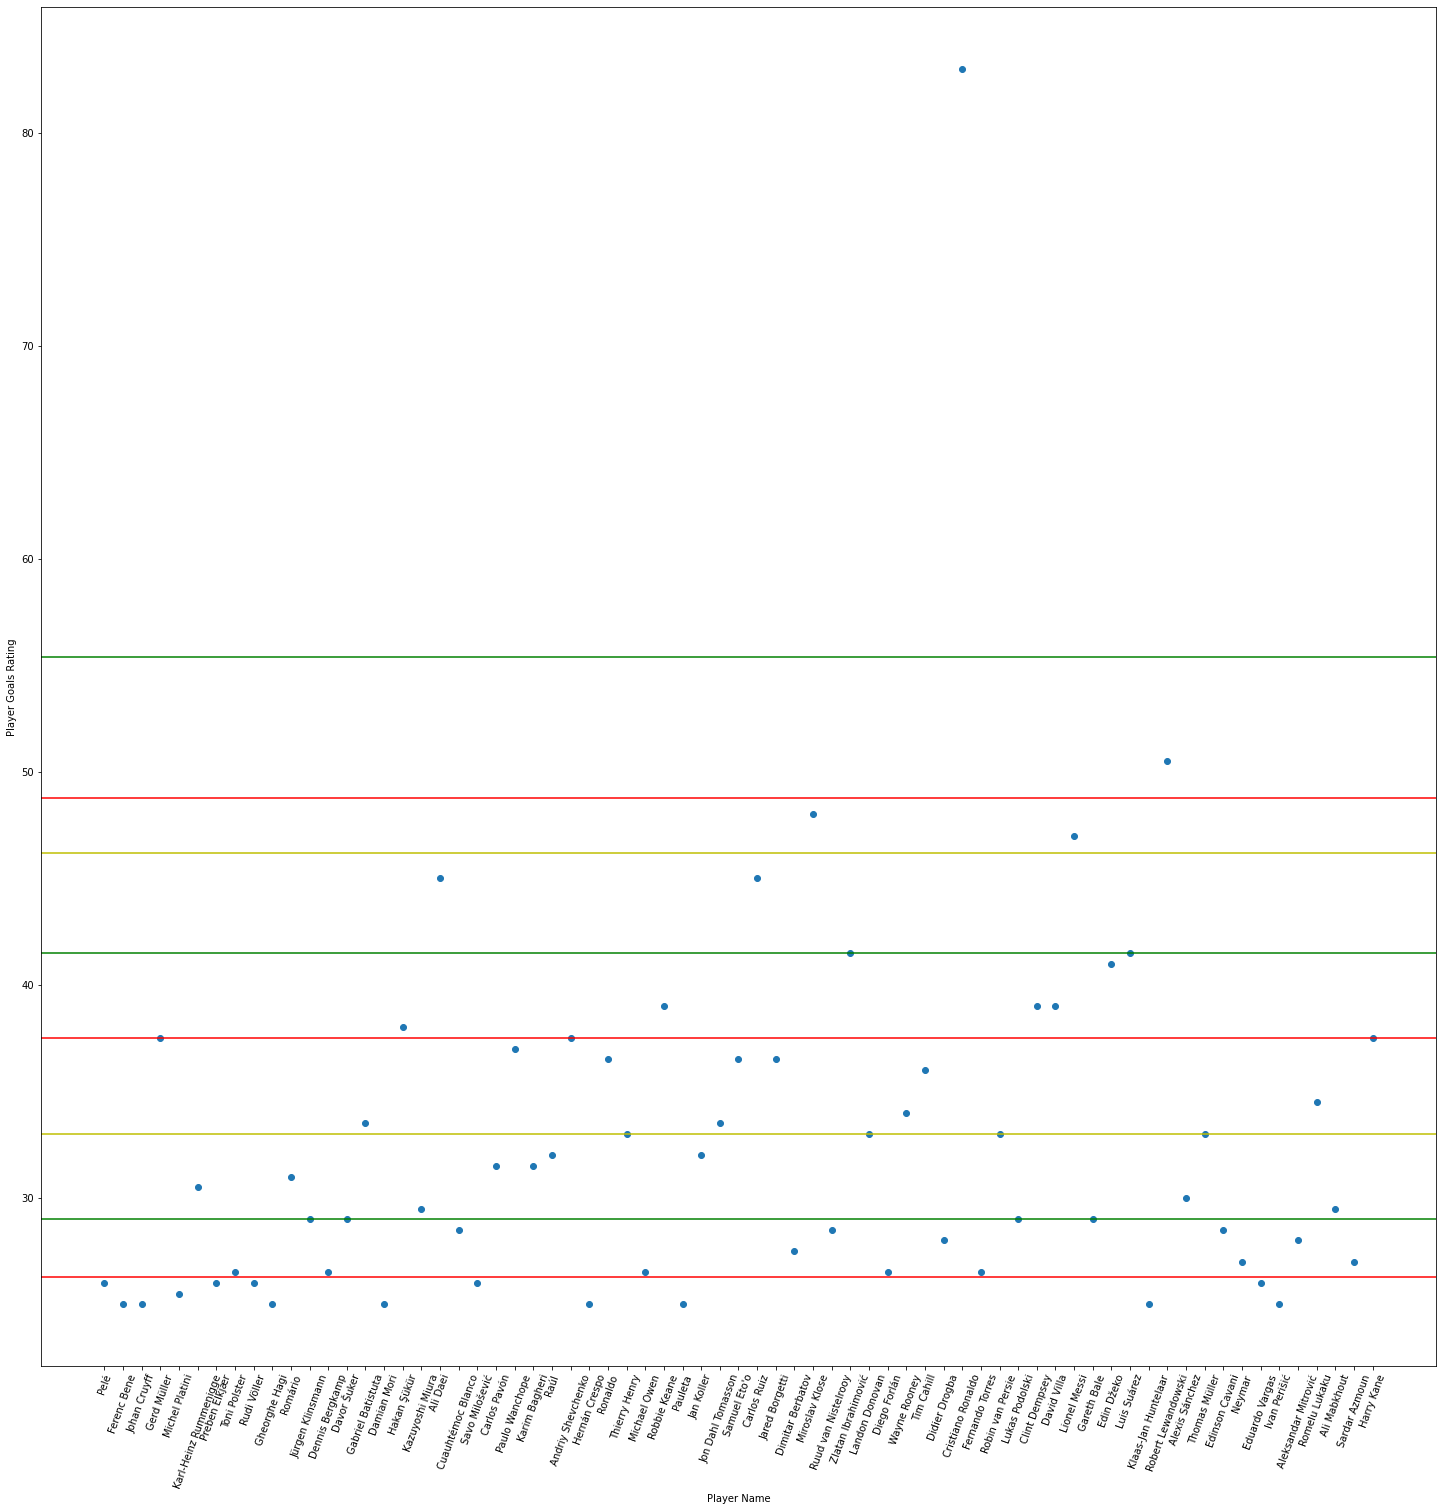

In [4]:
def scatterplot_scorer_df(dataframe):
    plt.figure(figsize = (25,25))
    plt.scatter(dataframe.name.tolist(), dataframe.rating.tolist())
    plt.xlabel('Player Name')
    plt.ylabel('Player Goals Rating')
    plt.xticks(rotation=70)
    plt.axhline(y=np.percentile(dataframe.rating.tolist(), 20),color='r')
    plt.axhline(y=np.percentile(dataframe.rating.tolist(), 40),color='g')
    plt.axhline(y=np.percentile(dataframe.rating.tolist(), 60),color='y')
    plt.axhline(y=np.percentile(dataframe.rating.tolist(), 80),color='r')
    plt.axhline(y=np.percentile(dataframe.rating.tolist(), 90),color='g')
    plt.axhline(y=np.percentile(dataframe.rating.tolist(), 95),color='y')
    plt.axhline(y=np.percentile(dataframe.rating.tolist(), 97.5),color='r')
    plt.axhline(y=np.percentile(dataframe.rating.tolist(), 98.75),color='g')
    plt.show()
scatterplot_scorer_df(top_half_percent)


In [5]:
def date_subtraction(date1, date2):
    date1 = [int(date1[0:4]), int(date1[5:7]), int(date1[8:10])]
    date2 = [int(date2[0:4]), int(date2[5:7]), int(date2[8:10])]
    return (date2[0] - date1[0]) * 365 + (date2[1]-date1[1]) * 30.437 + (date2[2]-date1[2])
                                                            #avg days in month
    
def determine_timeline(scorers, prolific_rating_df):
    scorer_dates = {}
    for ind in scorers.index:
        name = scorers.iloc[ind, 4]
        date = scorers.iloc[ind, 0]
        if name not in scorer_dates:
            scorer_dates[name] = [date]
        elif name in scorer_dates:
            (scorer_dates[name]).append(date)
    for key in scorer_dates:
        if scorer_dates[key][0] != scorer_dates[key][-1]:
            scorer_dates[key] = date_subtraction(scorer_dates[key][0], scorer_dates[key][-1])
        else:
            scorer_dates[key] = 36500 #100 years, to essentially disqualify people who scored once
    prolific_rating_df['elapsed_time'] = scorer_dates.values()
    prolific_rating_df['efficiency'] = (prolific_rating_df.rating/prolific_rating_df.elapsed_time)
    #Only consider those who have played for over a month 
    return prolific_rating_df[prolific_rating_df.elapsed_time > 1861]  #Scored at least 5 years apart (longevity needed)
prolific_rating_efficiency = determine_timeline(scorer_data,prolific_rating)
top_percent_efficiency = prolific_rating_efficiency[prolific_rating_efficiency.efficiency >= np.percentile(prolific_rating_efficiency.efficiency.tolist(), 99.5)]
top_percent_efficiency

,name,rating,elapsed_time,efficiency
738,Just Fontaine,21.0,2186.000,0.009607
1714,Gerd Müller,37.5,2645.311,0.014176
1757,Gigi Riva,19.0,2178.563,0.008721
2725,Hans Krankl,18.0,2023.378,0.008896
2924,Karl-Heinz Rummenigge,30.5,2943.000,0.010364
3005,Preben Elkjær,26.0,3049.748,0.008525
3885,Gary Lineker,20.5,2217.437,0.009245
4454,Dennis Bergkamp,26.5,2781.252,0.009528
4457,Florin Răducioiu,20.0,2020.378,0.009899
4508,Luís Roberto Alves,20.5,2288.748,0.008957


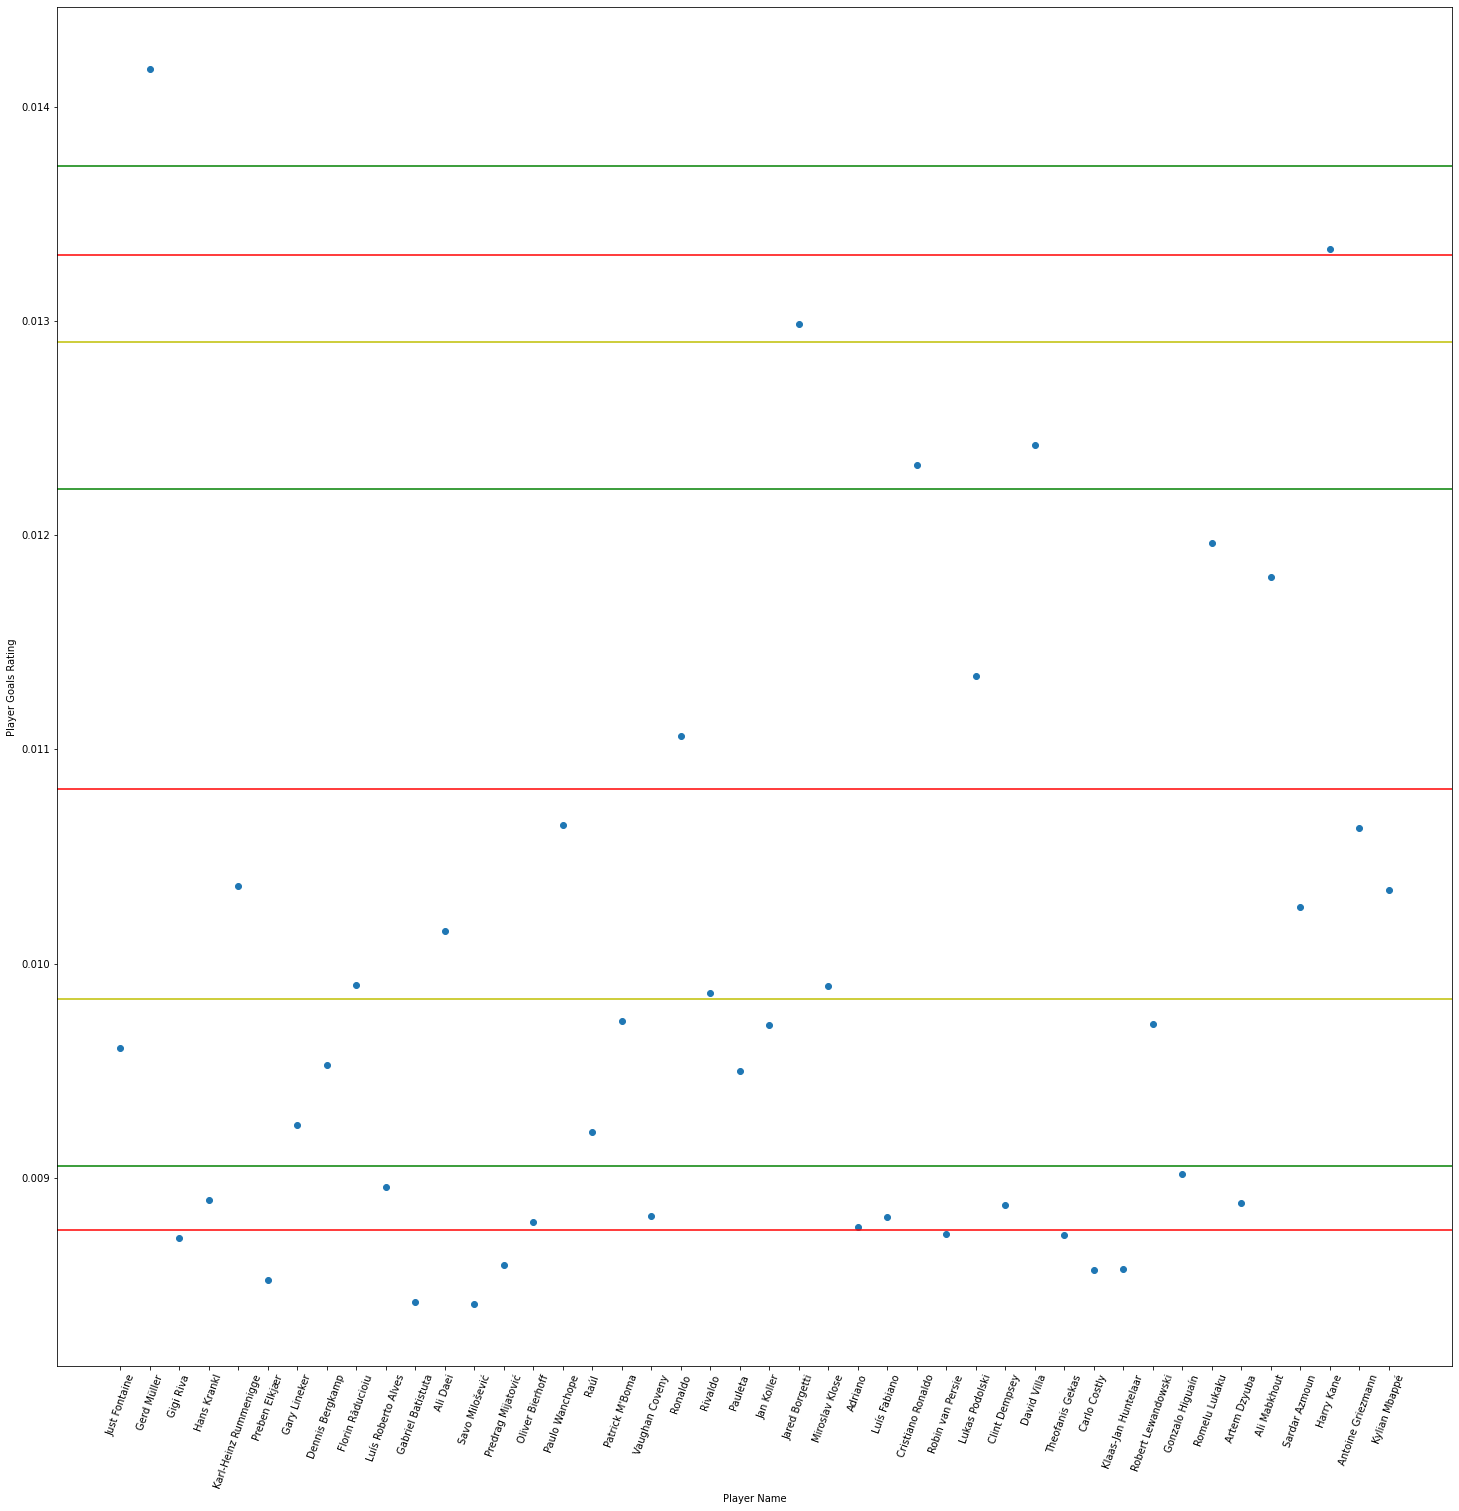

In [6]:

plt.figure(figsize = (25,25))
plt.scatter(top_percent_efficiency.name.tolist(), top_percent_efficiency.efficiency.tolist())
plt.xlabel('Player Name')
plt.ylabel('Player Goals Rating')
plt.xticks(rotation=70)
plt.axhline(y=np.percentile(top_percent_efficiency.efficiency.tolist(), 20),color='r')
plt.axhline(y=np.percentile(top_percent_efficiency.efficiency.tolist(), 40),color='g')
plt.axhline(y=np.percentile(top_percent_efficiency.efficiency.tolist(), 60),color='y')
plt.axhline(y=np.percentile(top_percent_efficiency.efficiency.tolist(), 80),color='r')
plt.axhline(y=np.percentile(top_percent_efficiency.efficiency.tolist(), 90),color='g')
plt.axhline(y=np.percentile(top_percent_efficiency.efficiency.tolist(), 95),color='y')
plt.axhline(y=np.percentile(top_percent_efficiency.efficiency.tolist(), 97.5),color='r')
plt.axhline(y=np.percentile(top_percent_efficiency.efficiency.tolist(), 98.75),color='g')
plt.show()

# By Decade Analysis

In [7]:
unindexed_scorer_data = scorer_data.set_index('date')
unindexed_scorer_data

,home_team,away_team,team,scorer,minute,own_goal,penalty
date,,,,,,,
1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...
2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False


In [8]:
def create_decade_dfs(scorers):
    decade_dfs = []
    for i in range(191,203):
        decade_dfs.append((scorers.filter(like=str(i), axis=0)).reset_index())
    return decade_dfs
decade_scorers = create_decade_dfs(unindexed_scorer_data)
decade_scorers

[          date  home_team away_team       team               scorer  minute  \
 0   1916-07-02      Chile   Uruguay    Uruguay      José Piendibene    44.0   
 1   1916-07-02      Chile   Uruguay    Uruguay     Isabelino Gradín    55.0   
 2   1916-07-02      Chile   Uruguay    Uruguay     Isabelino Gradín    70.0   
 3   1916-07-02      Chile   Uruguay    Uruguay      José Piendibene    75.0   
 4   1916-07-06  Argentina     Chile  Argentina        Alberto Ohaco     2.0   
 ..         ...        ...       ...        ...                  ...     ...   
 61  1919-05-26     Brazil   Uruguay    Uruguay     Isabelino Gradín    13.0   
 62  1919-05-26     Brazil   Uruguay    Uruguay       Carlos Scarone    17.0   
 63  1919-05-26     Brazil   Uruguay     Brazil                 Neco    29.0   
 64  1919-05-26     Brazil   Uruguay     Brazil                 Neco    63.0   
 65  1919-05-29     Brazil   Uruguay     Brazil  Arthur Friedenreich   122.0   
 
     own_goal  penalty  
 0      False

In [9]:
decade_totals = []
for df in decade_scorers:
    decade_totals.append(goalscorer_analysis(df))
decade_totals

[                            name  rating
 0                José Piendibene     2.0
 1               Isabelino Gradín     5.0
 2                  Alberto Ohaco     3.0
 3                 Telésforo Báez     1.0
 4             Juan Domingo Brown     1.0
 5           Alberto Marcovecchio     2.0
 6   Demóstenes Correia de Syllos     1.0
 7               Hernando Salazar     1.0
 8             José Durand Laguna     1.0
 9           Manoel Alencar Monte     1.0
 10           Arthur Friedenreich     5.0
 11                  Jose Tognola     1.0
 12                Carlos Scarone     5.5
 13                  Ángel Romano     4.0
 14                          Neco     6.0
 15                Pedro Calomino     1.0
 16                Silvio Lagreca     0.5
 17                Antonio Blanco     1.0
 18                   Luis García     0.0
 19                Héctor Scarone     3.0
 20                  Caetano Izzo     1.0
 21             Haroldo Domingues     3.0
 22                Amílcar Barbuy 

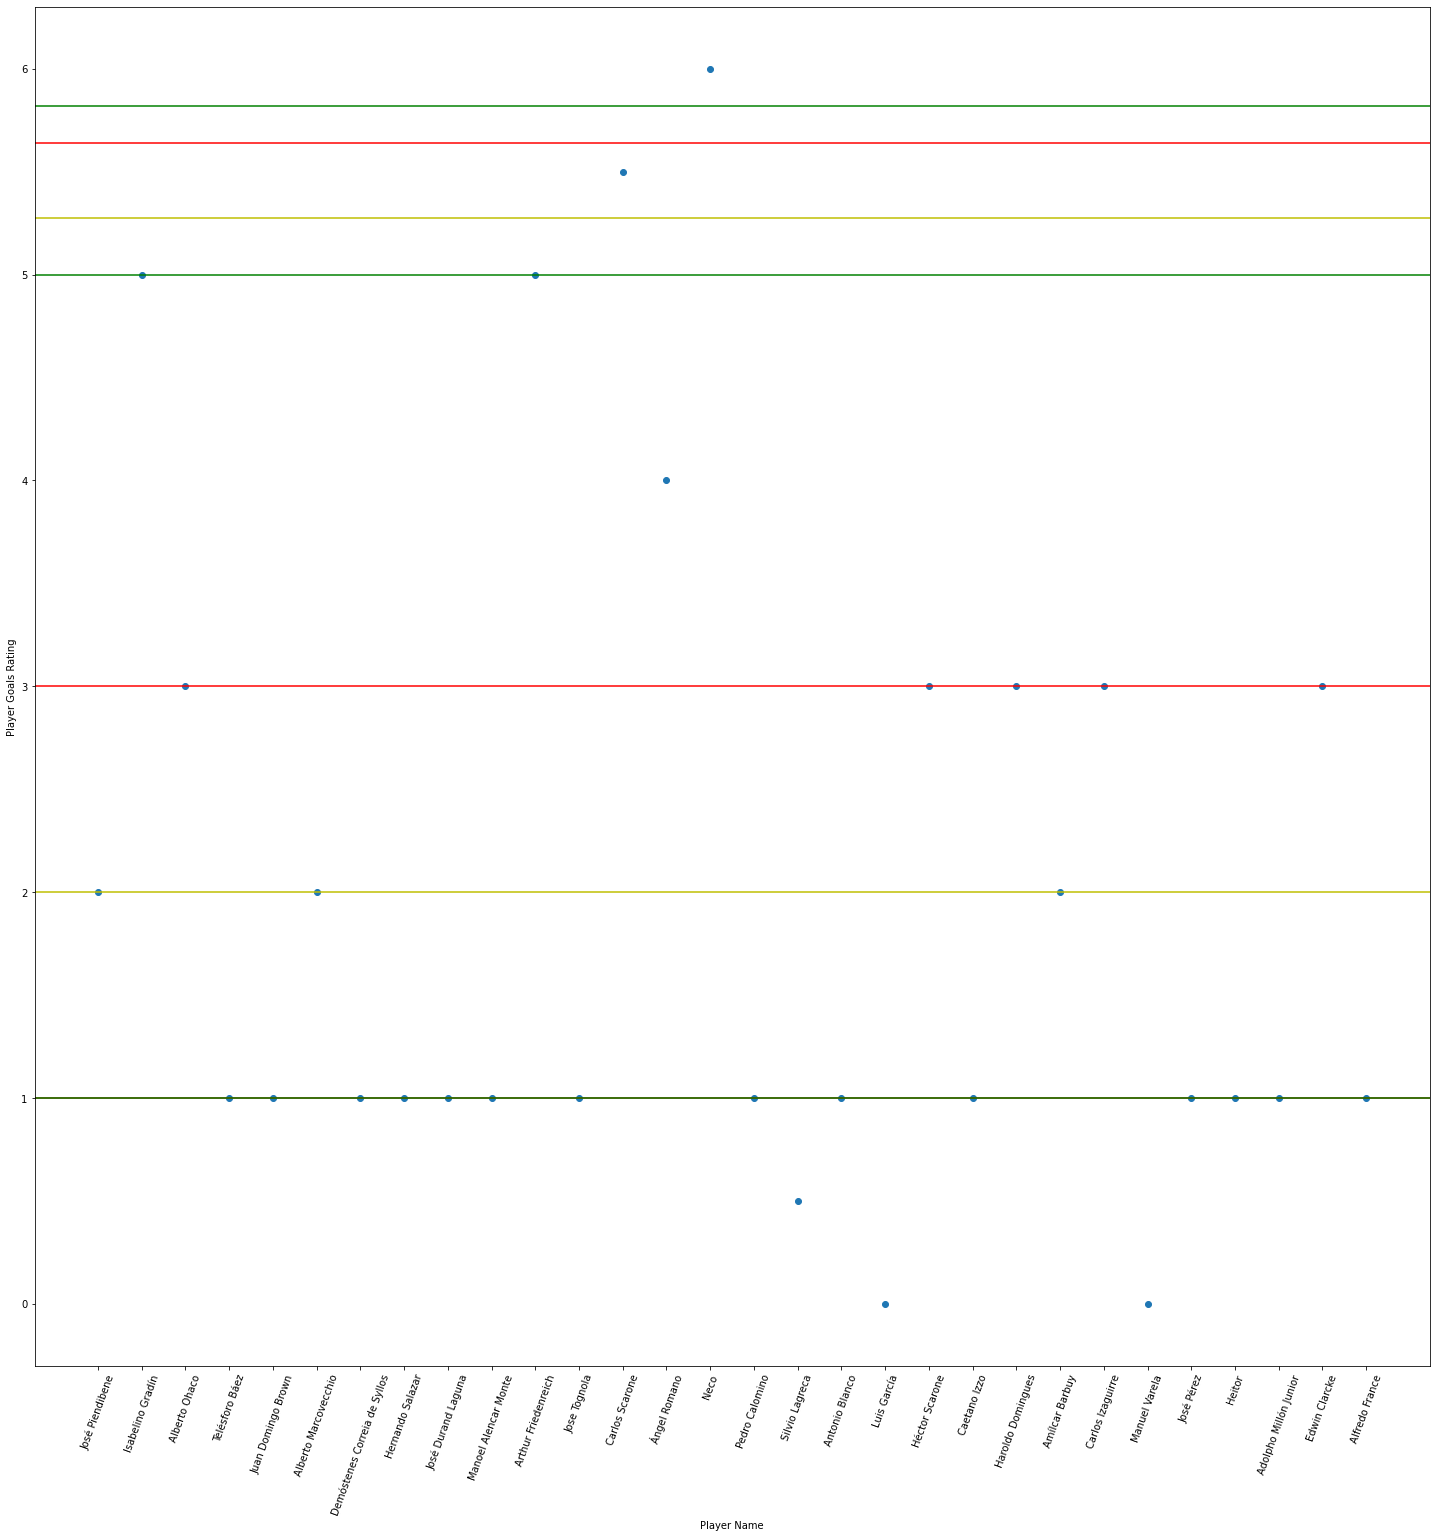

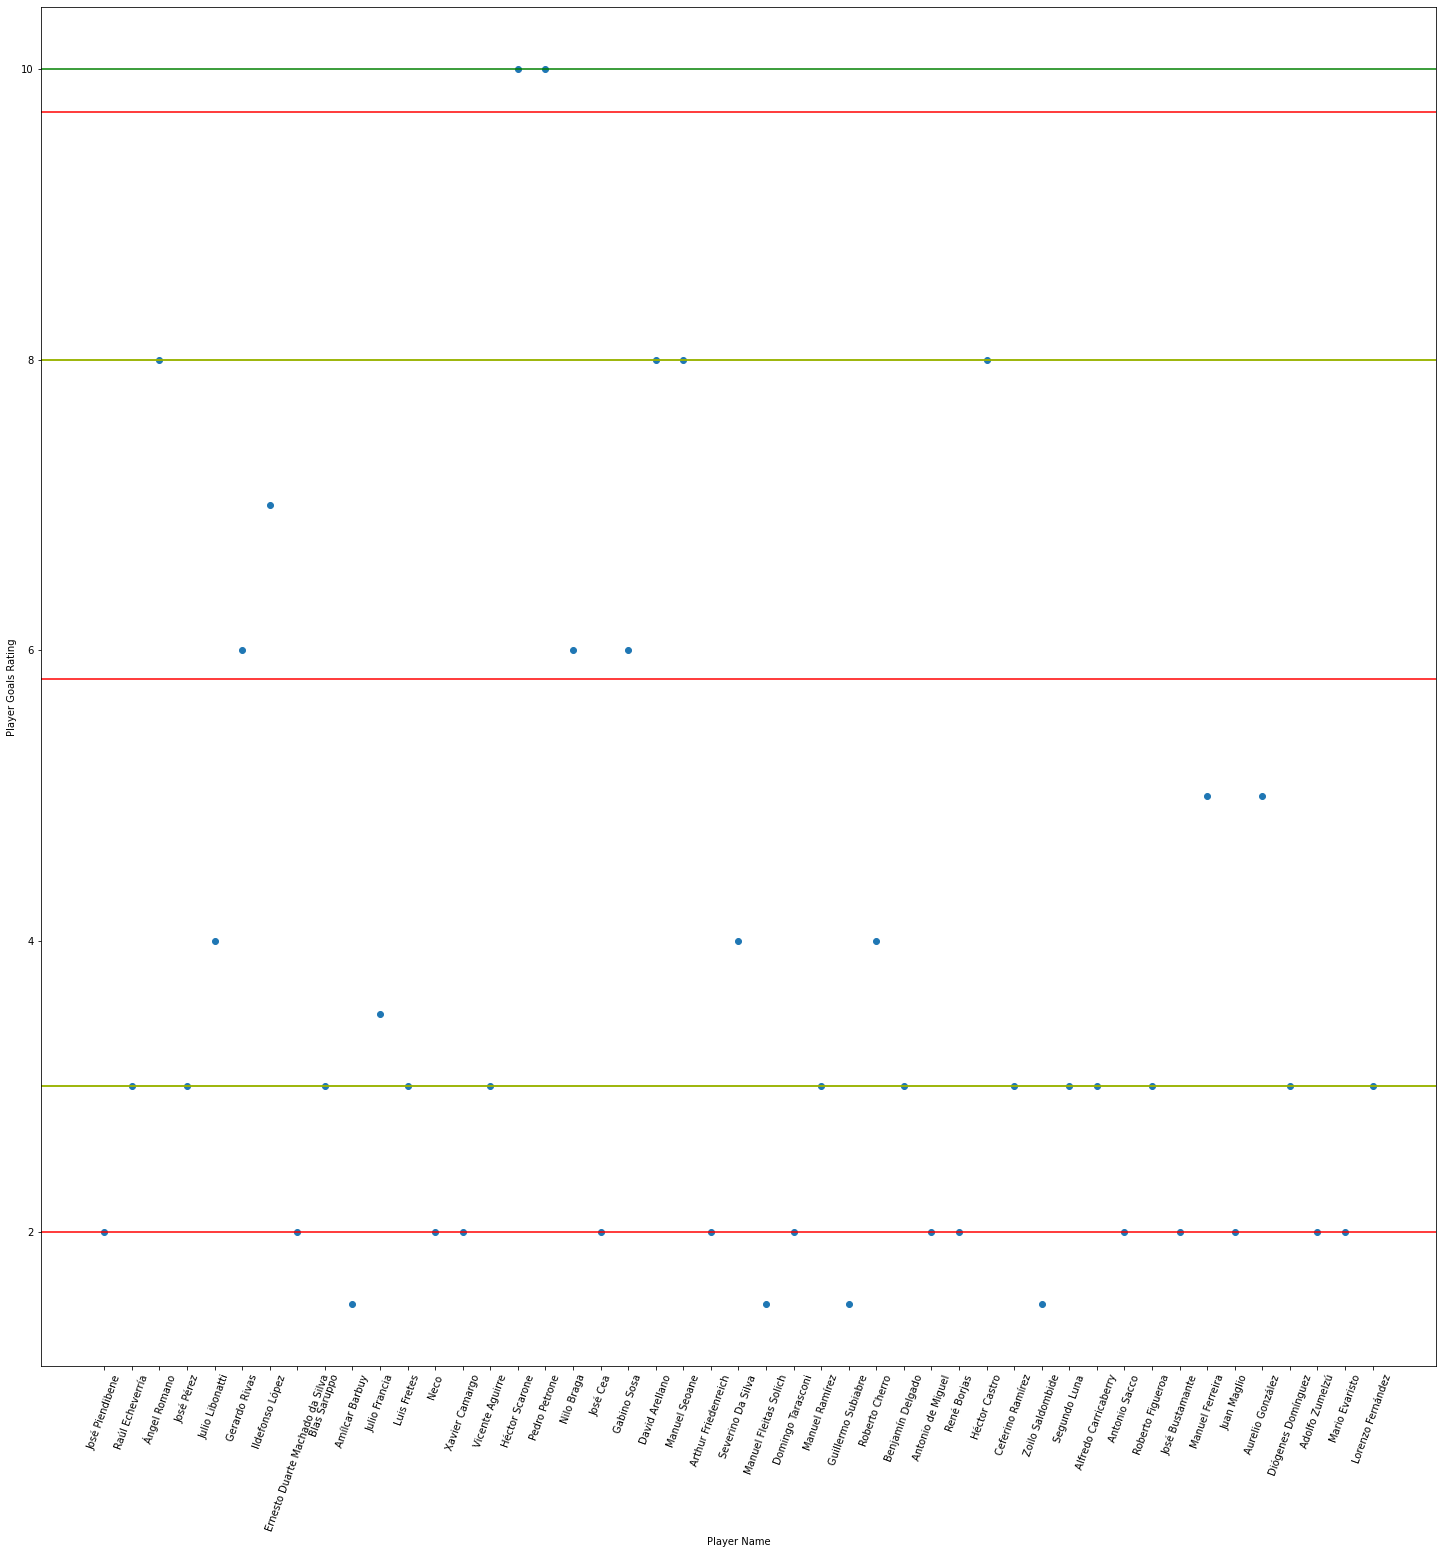

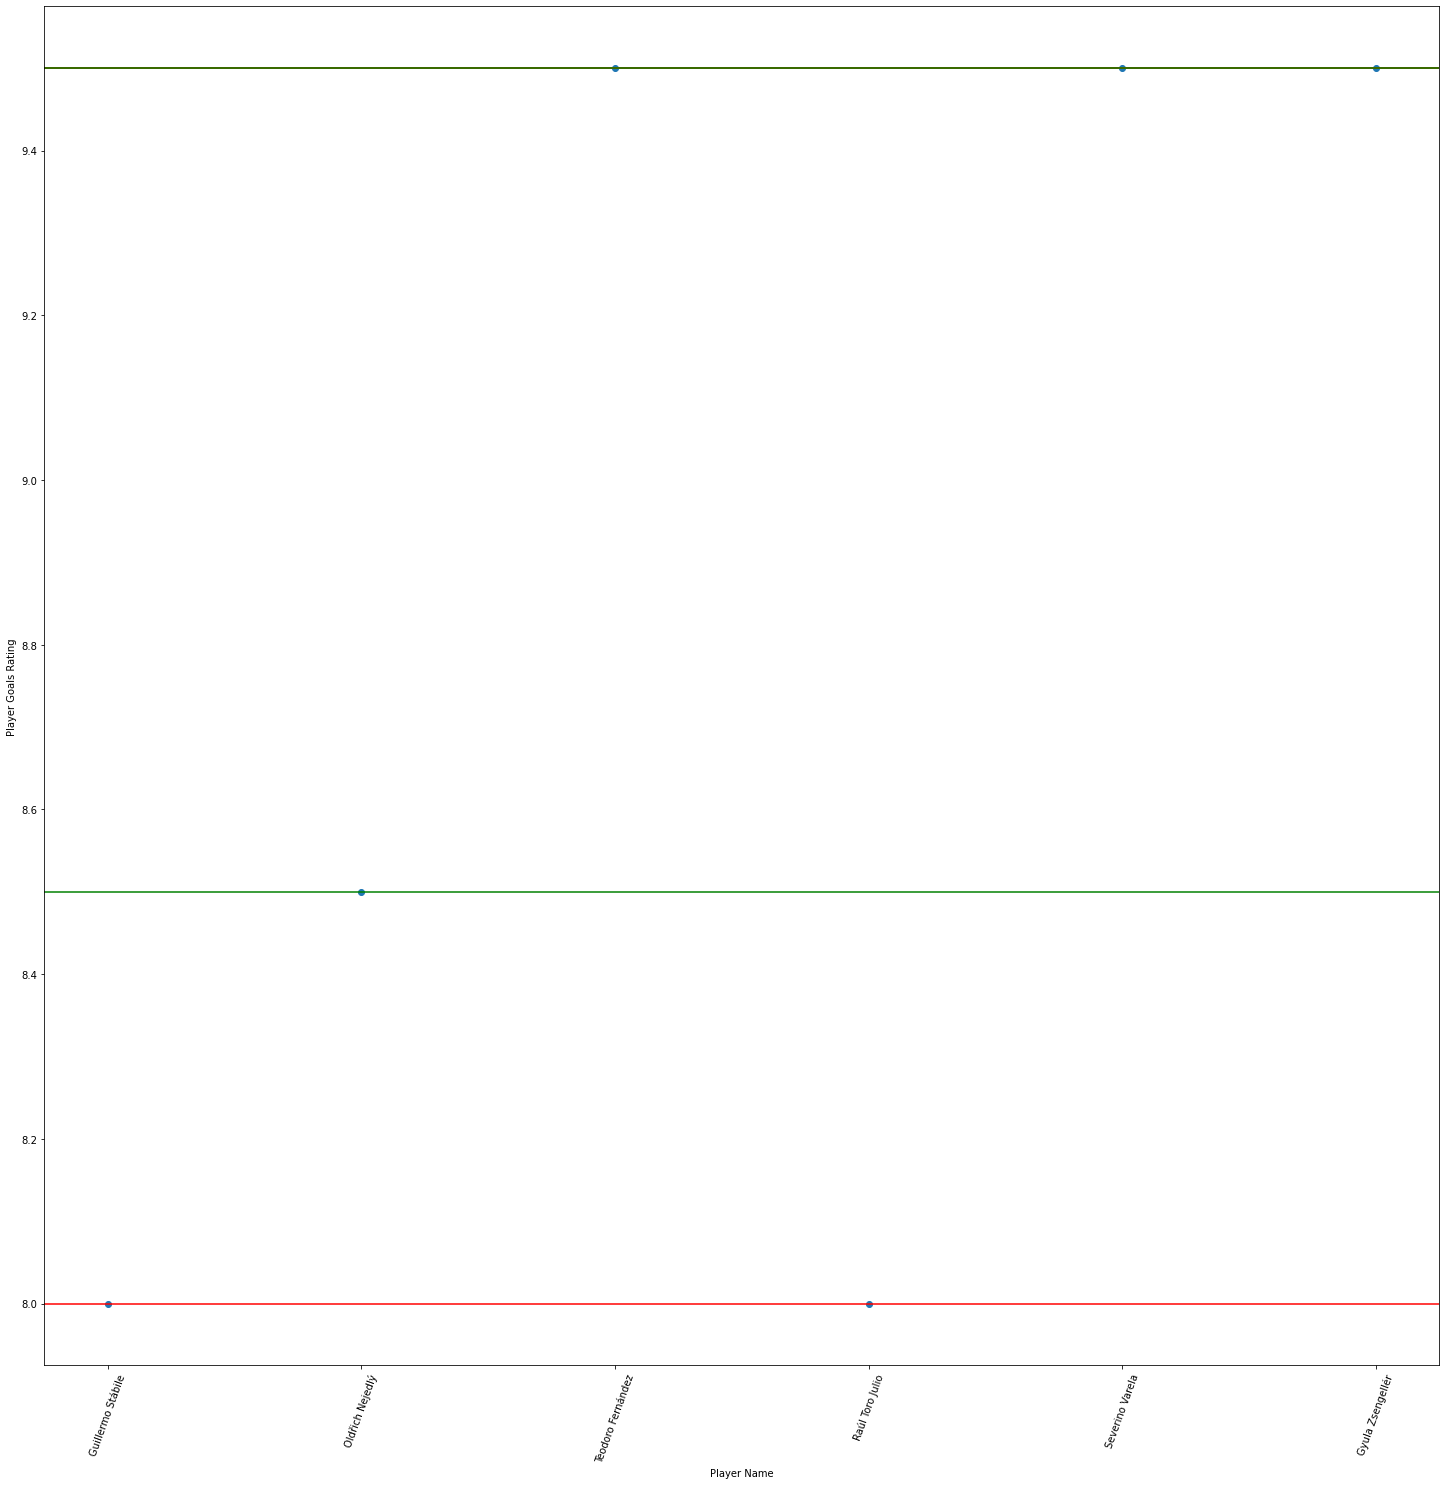

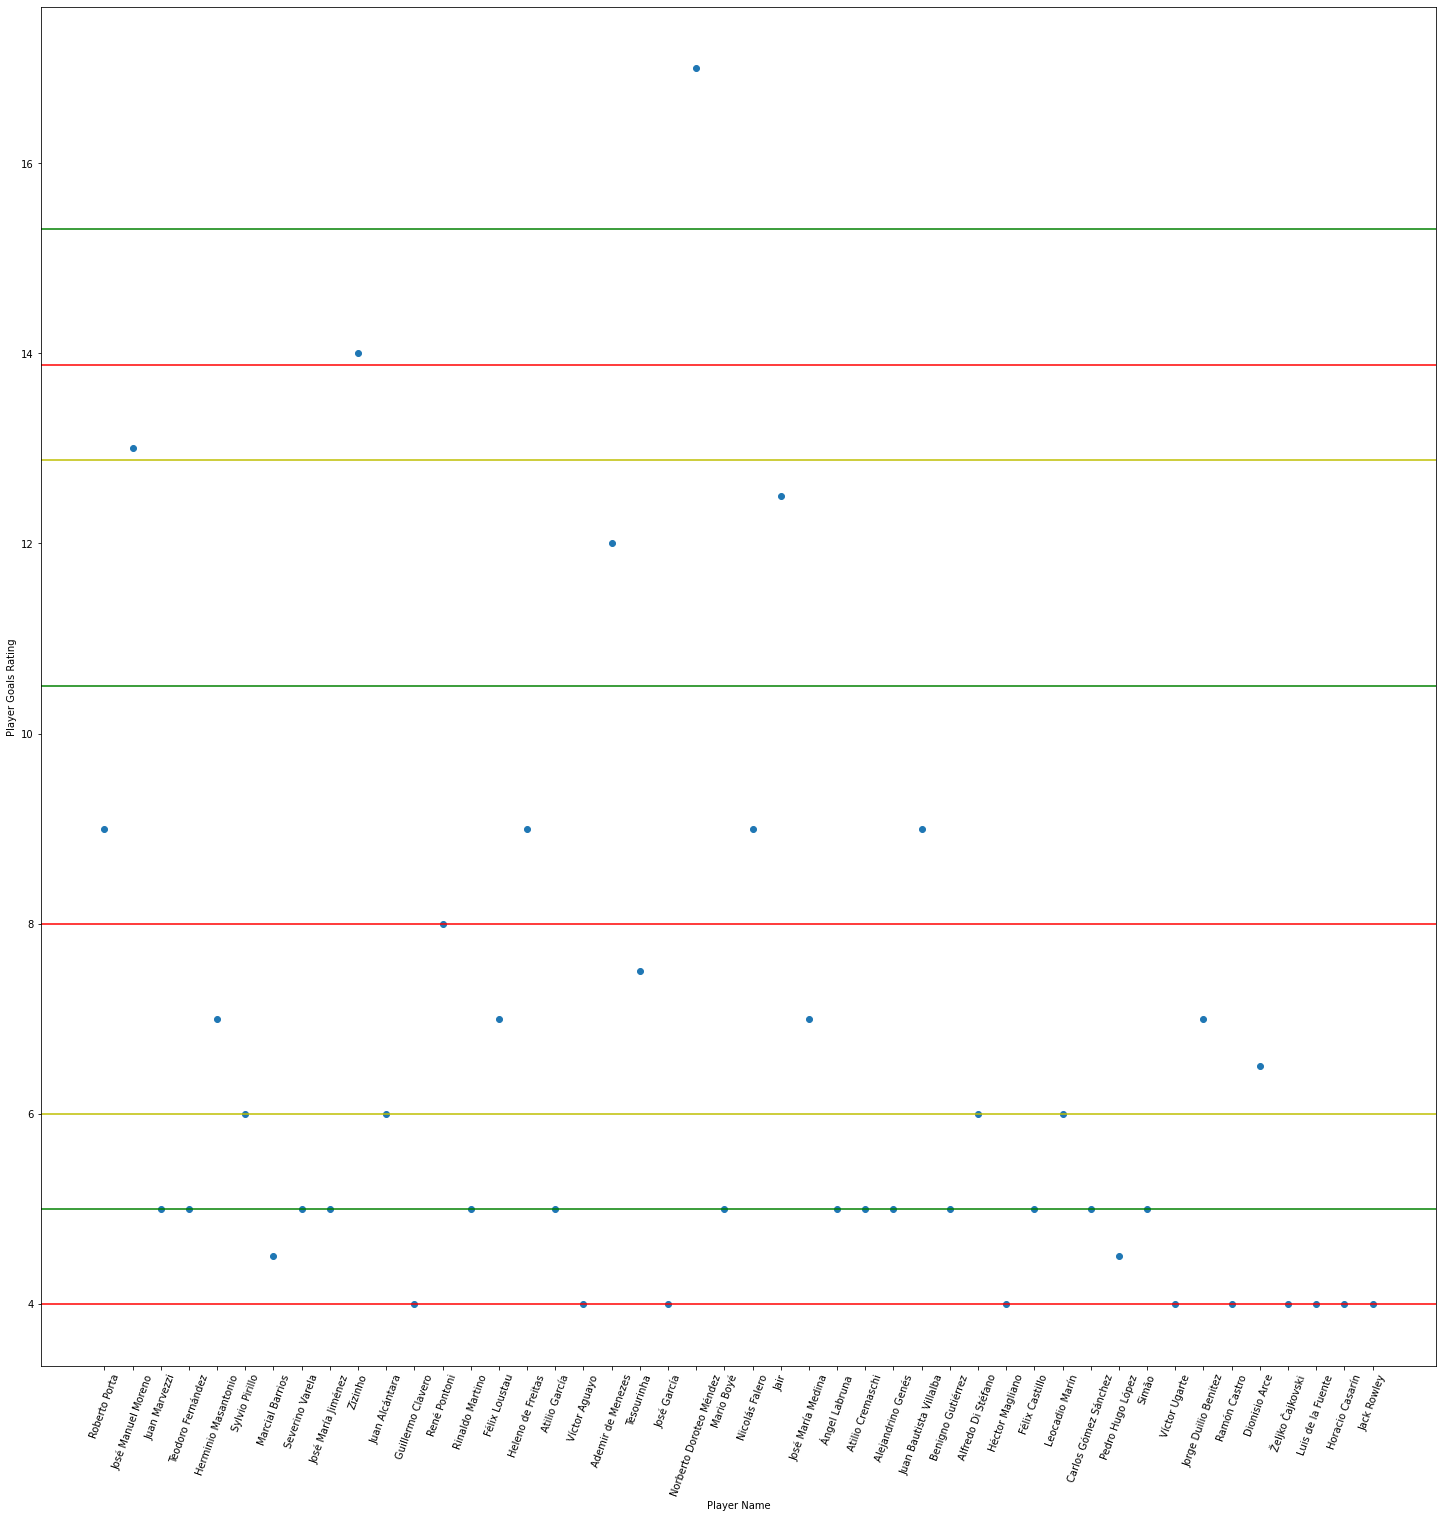

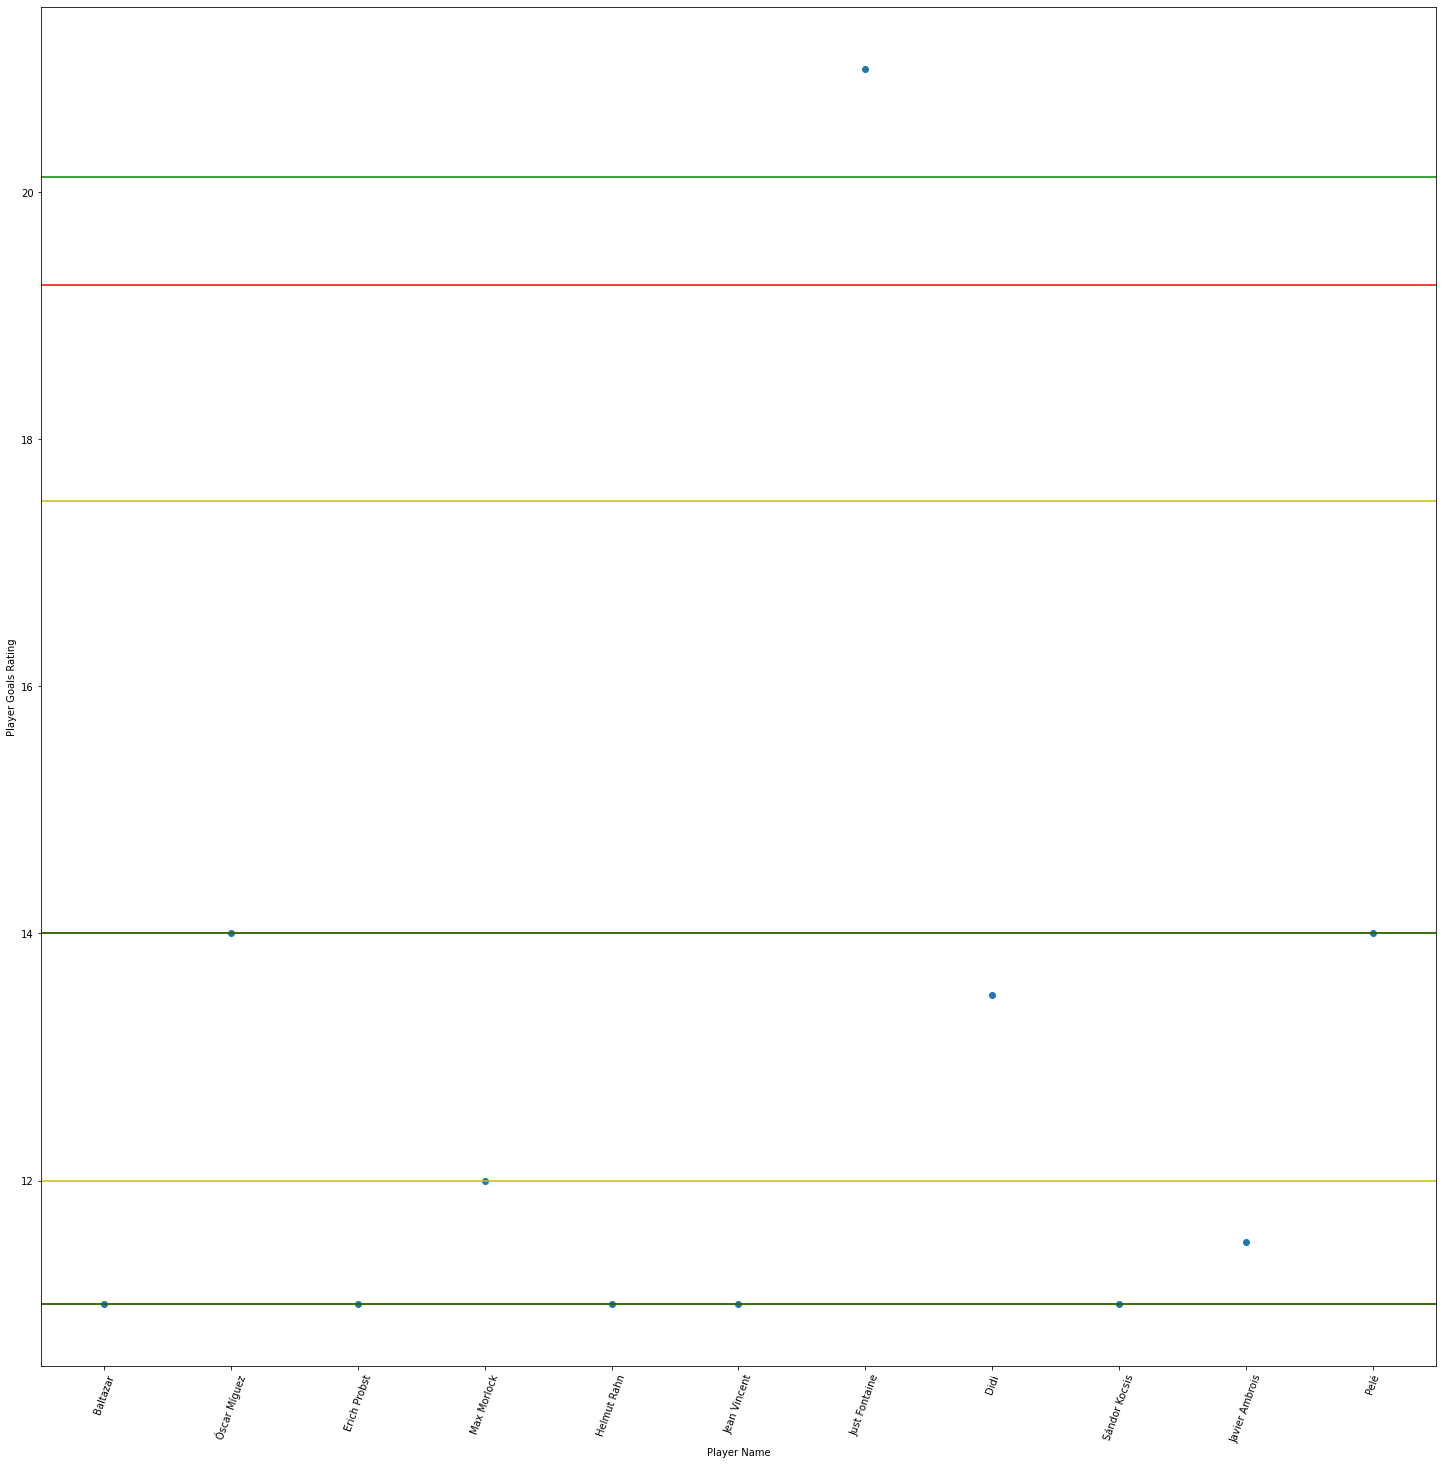

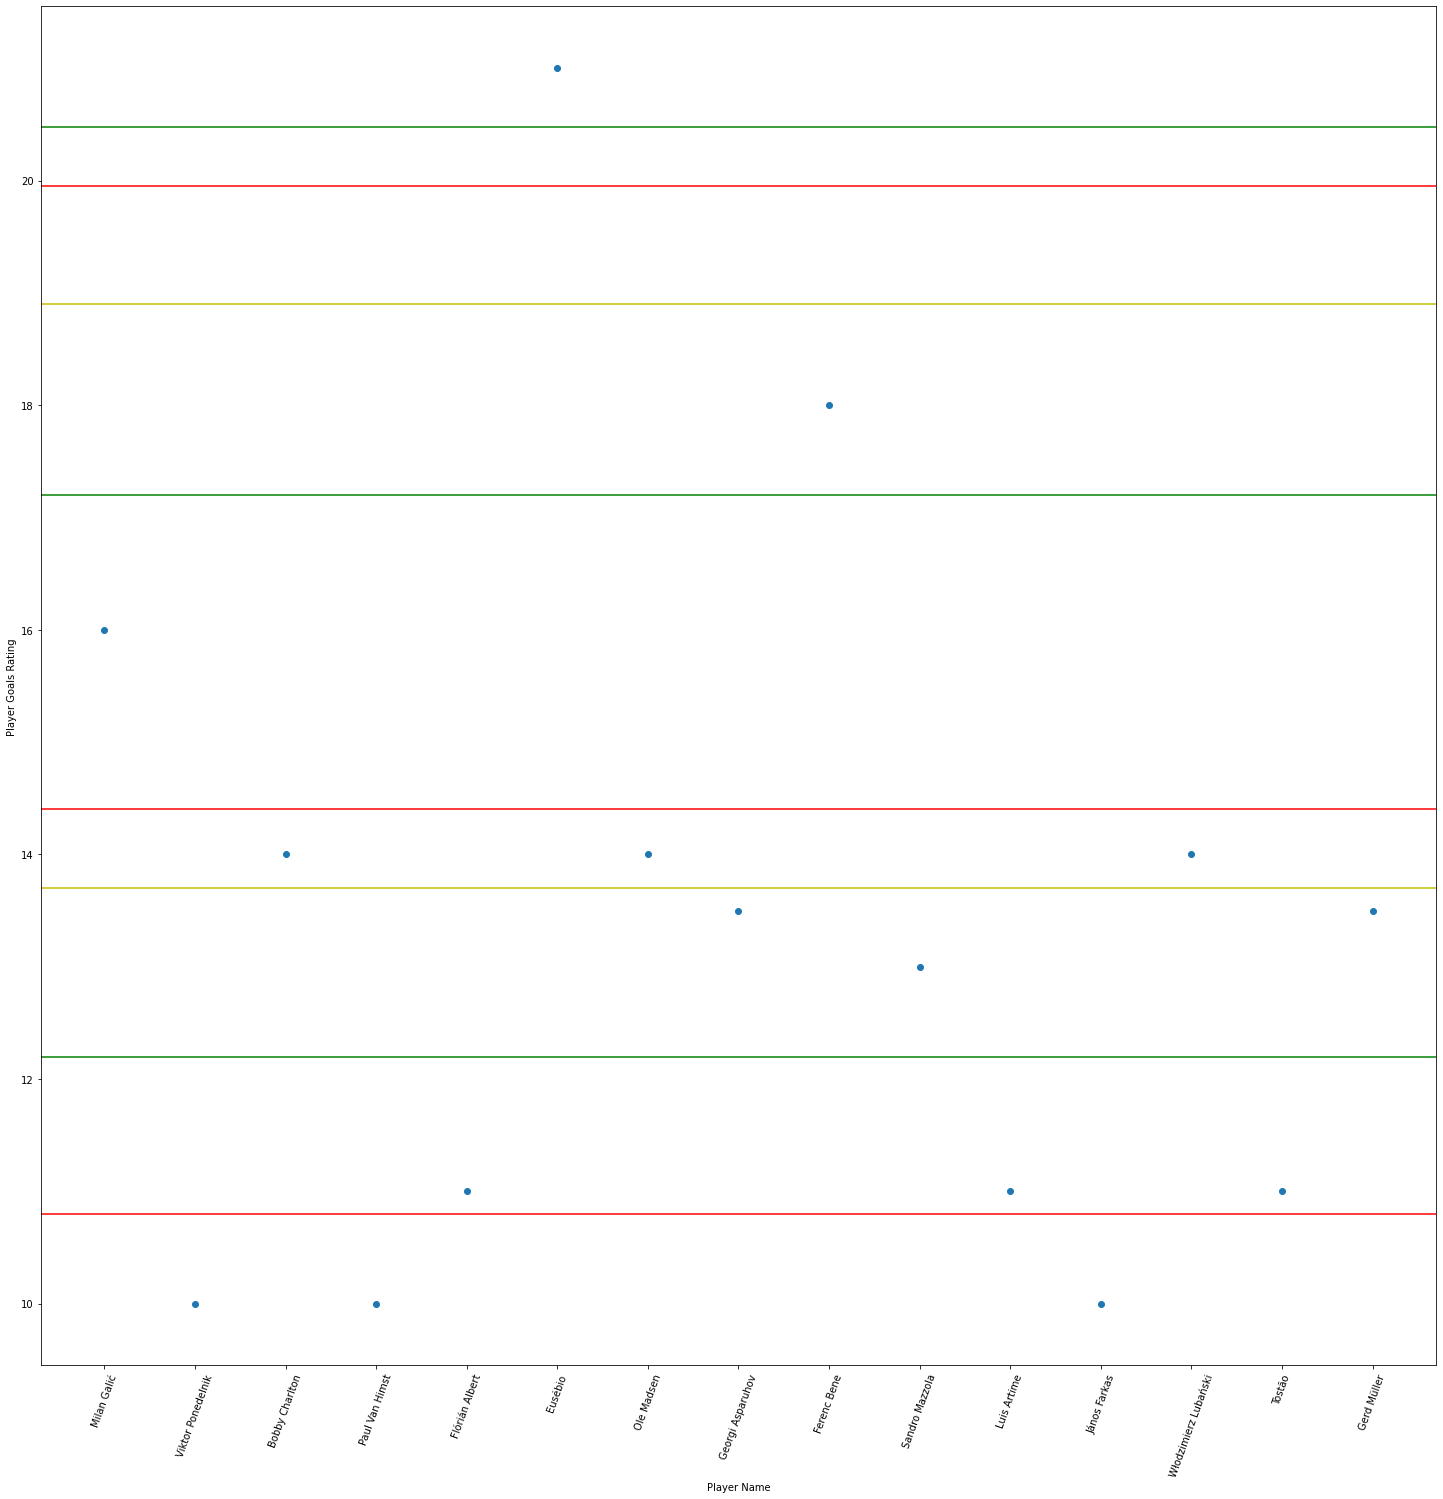

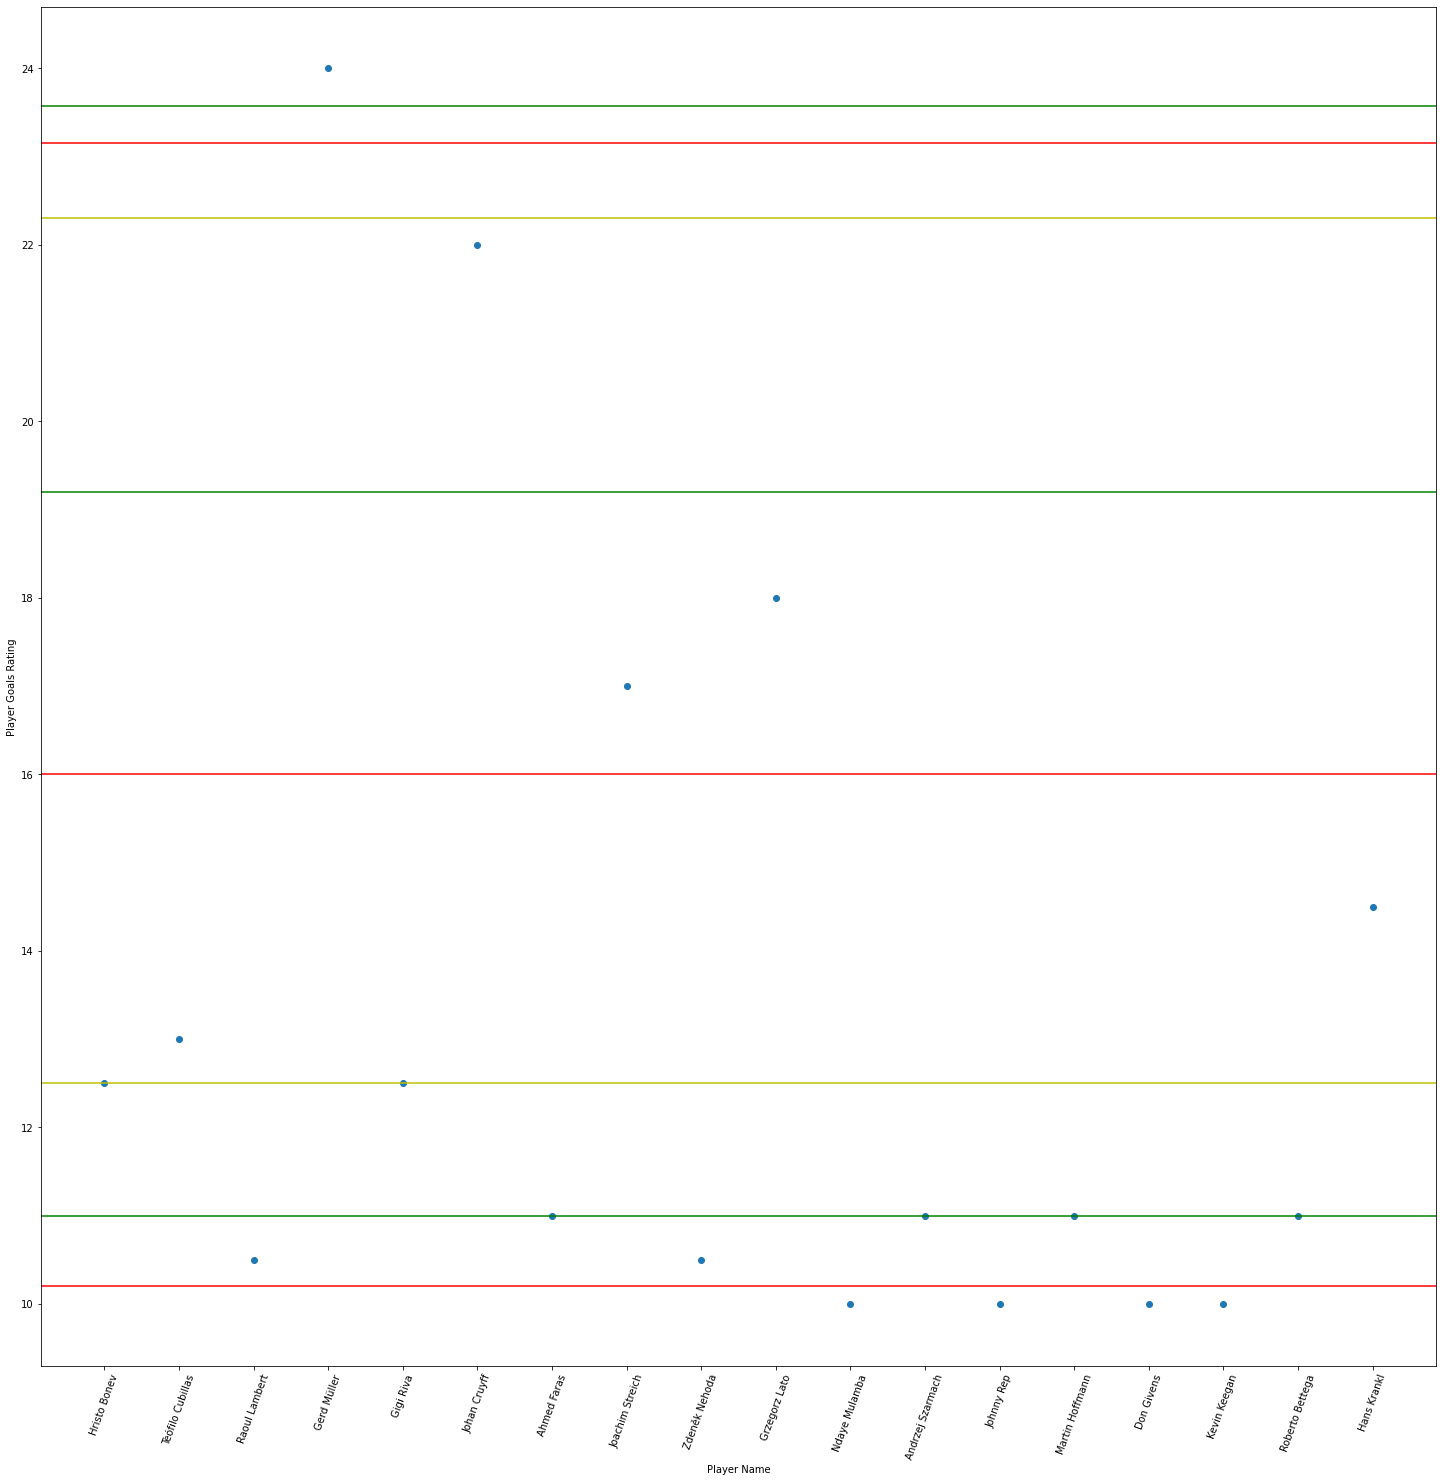

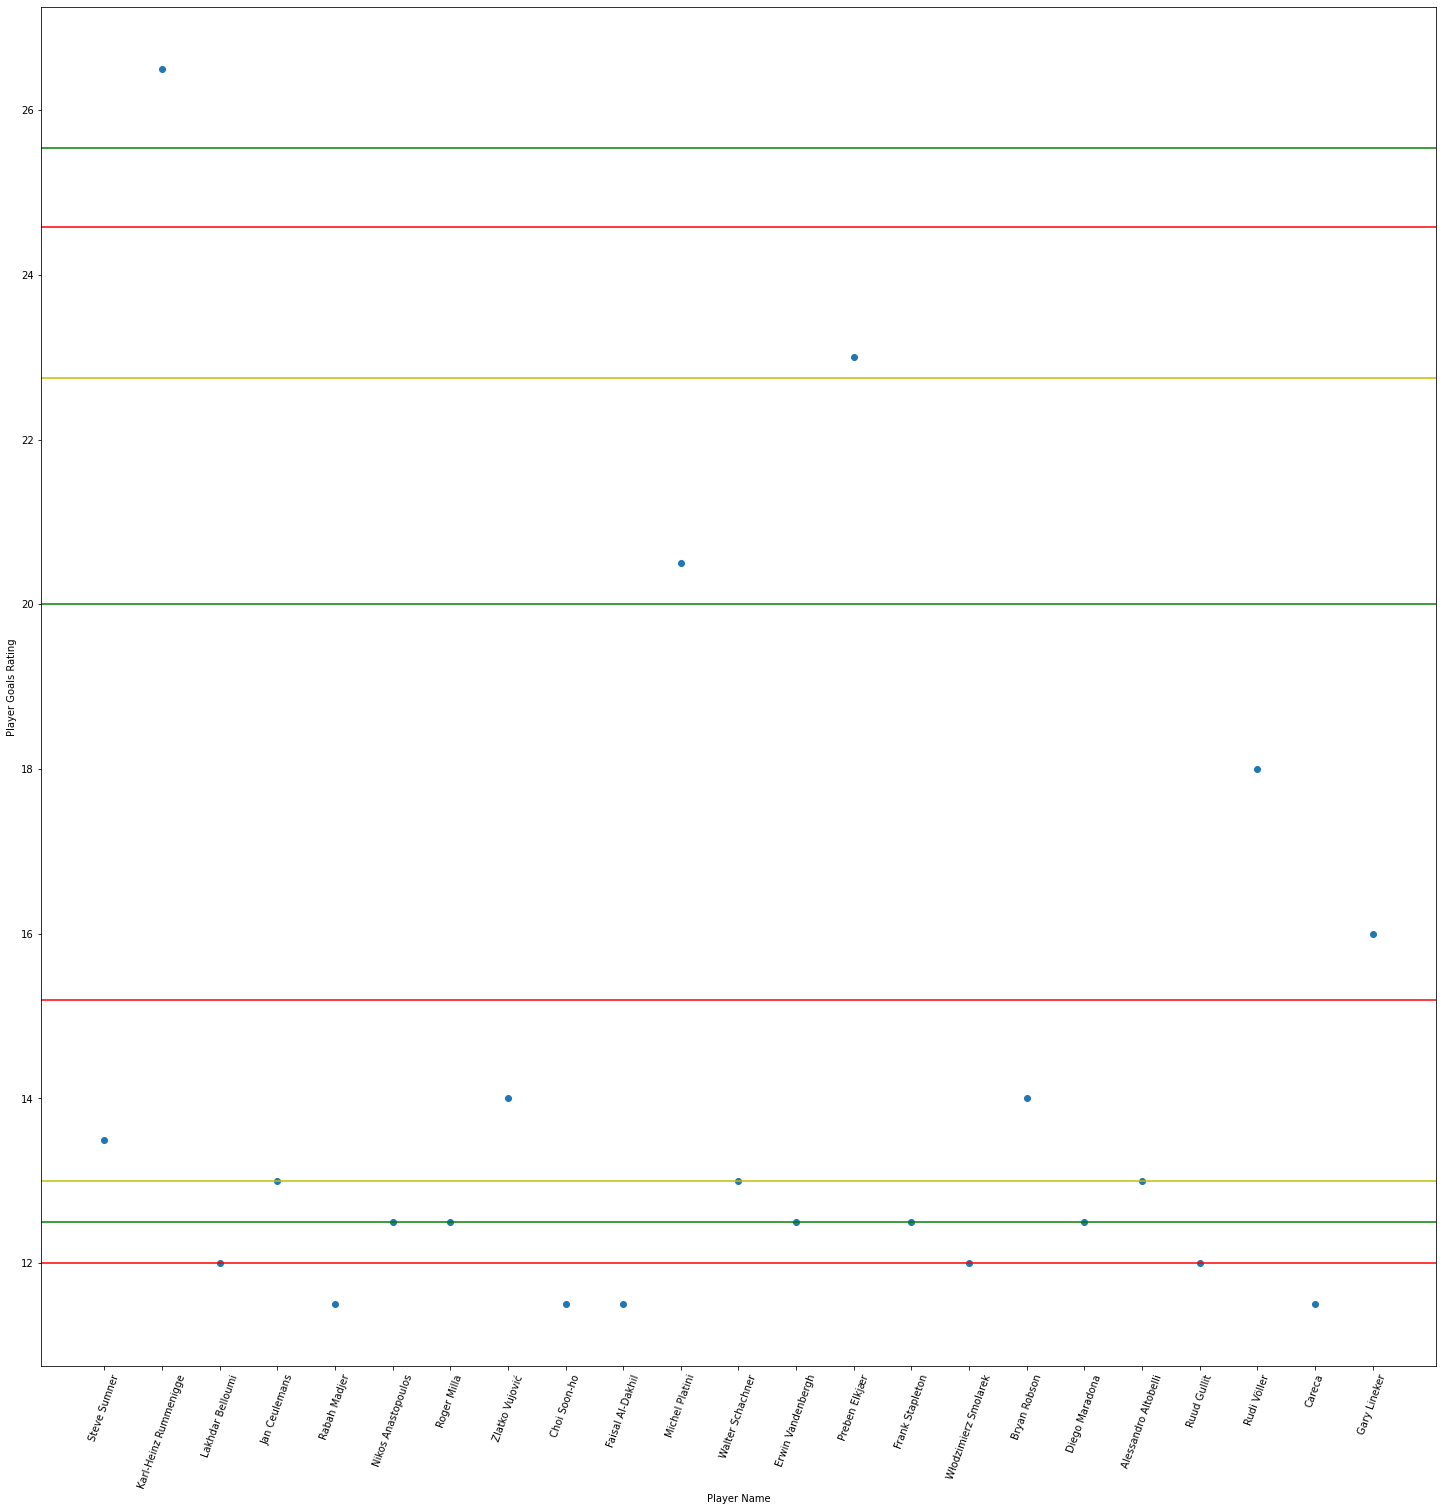

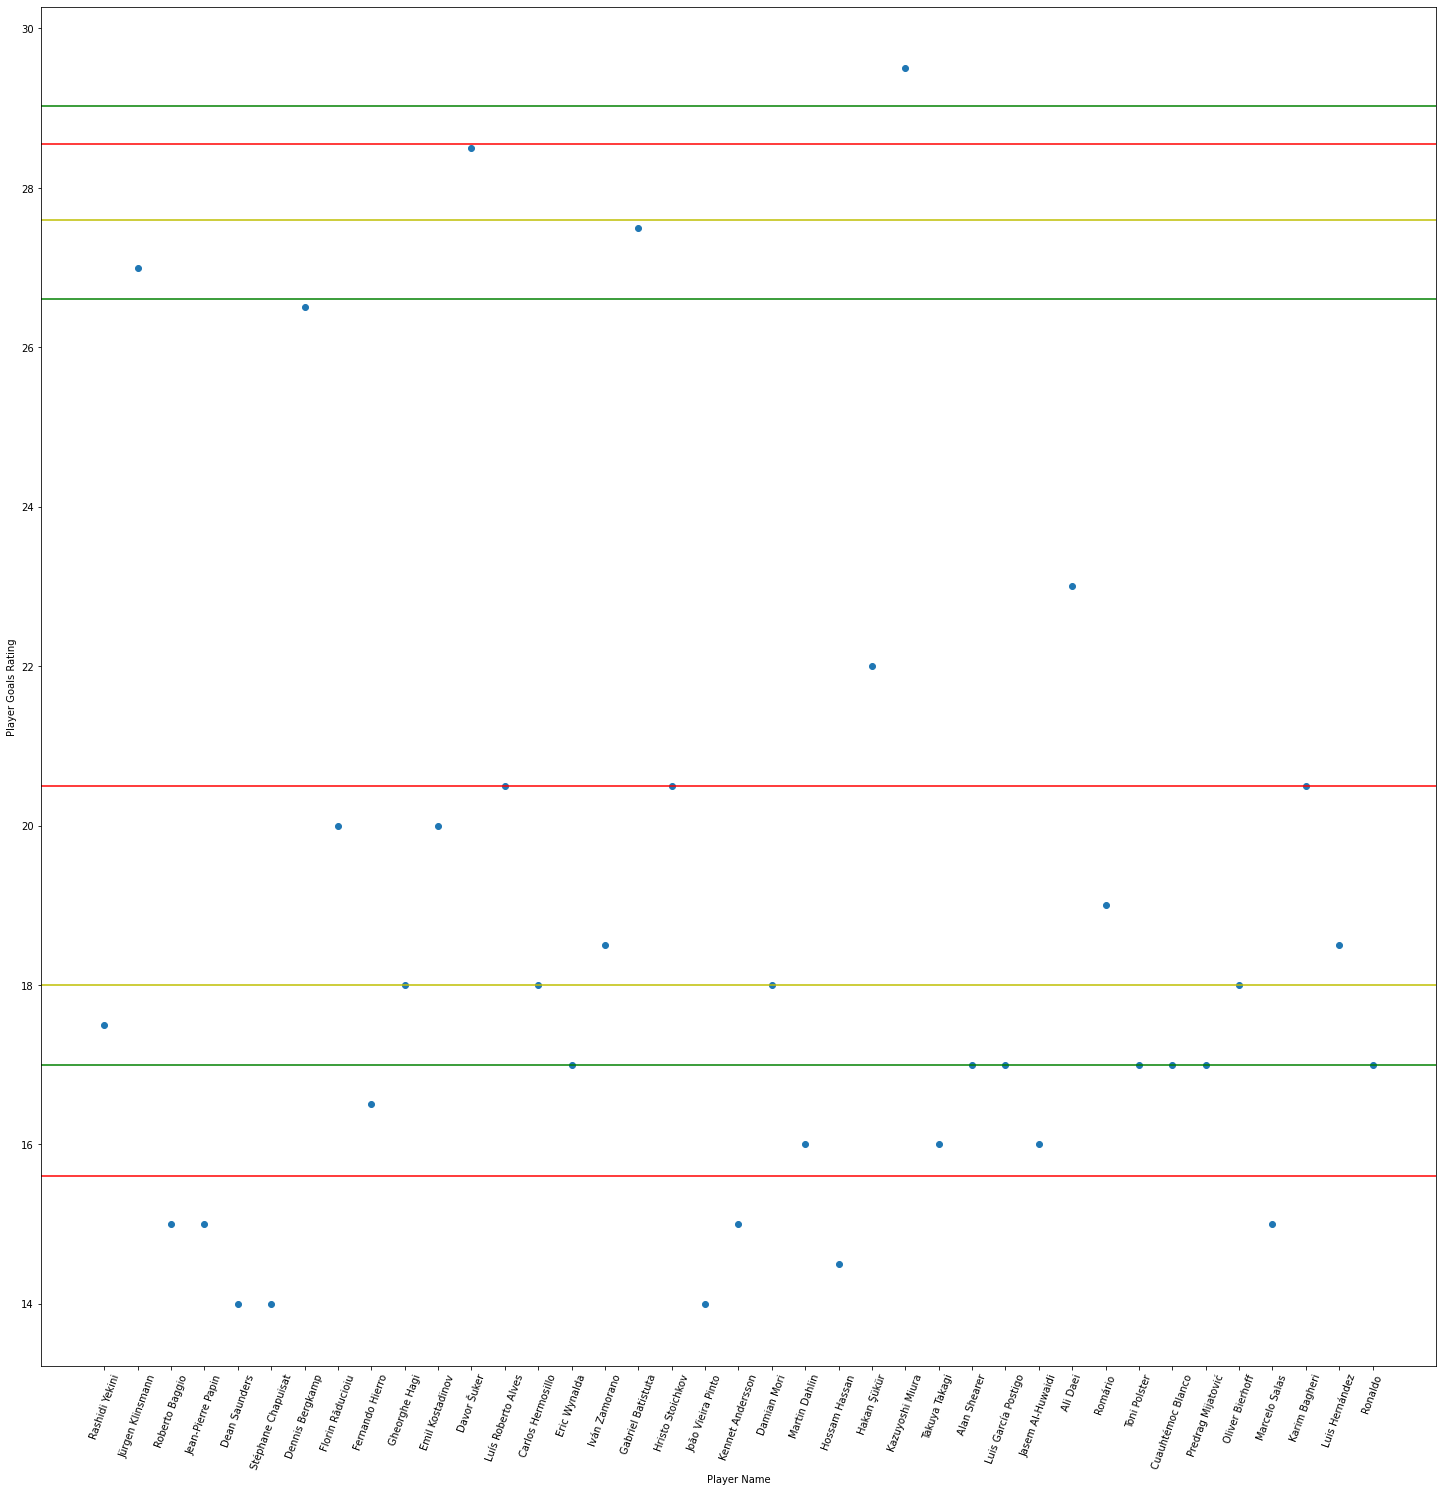

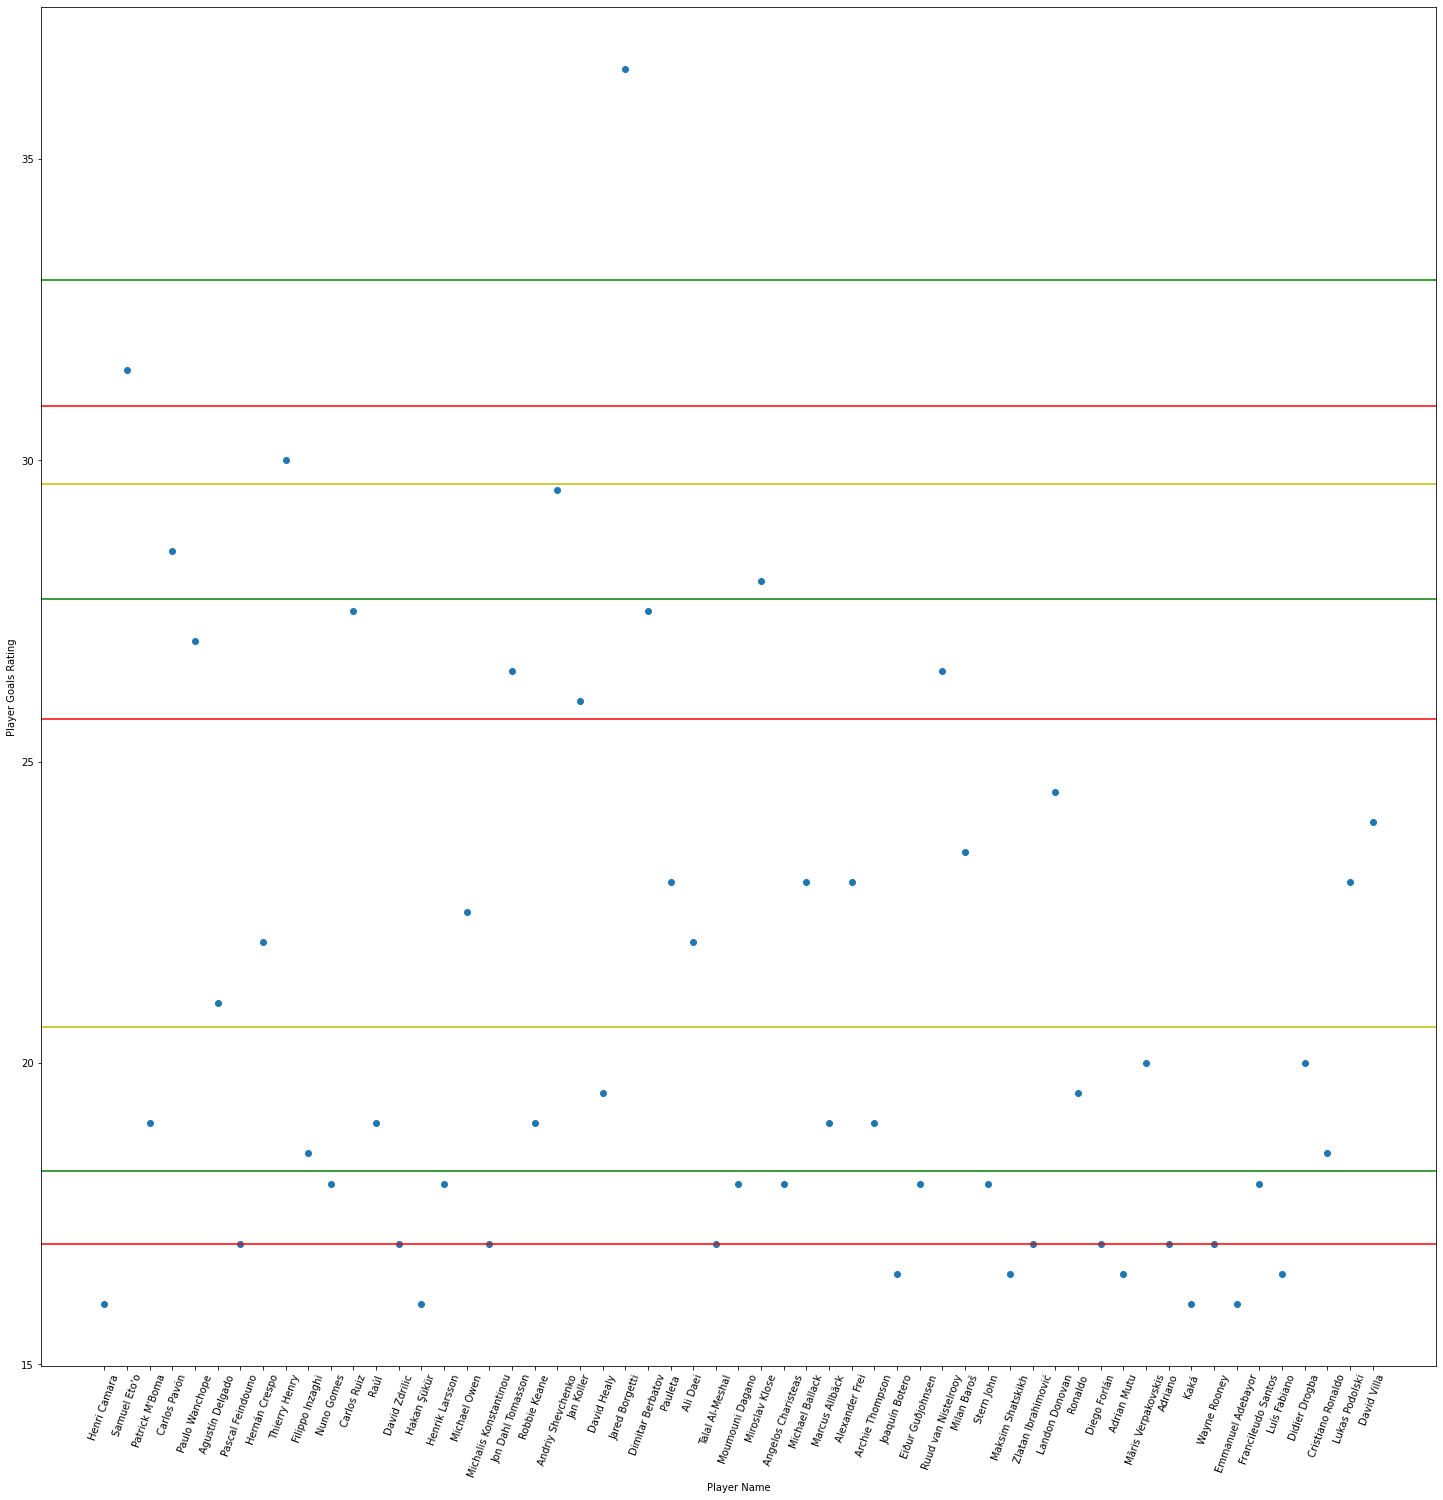

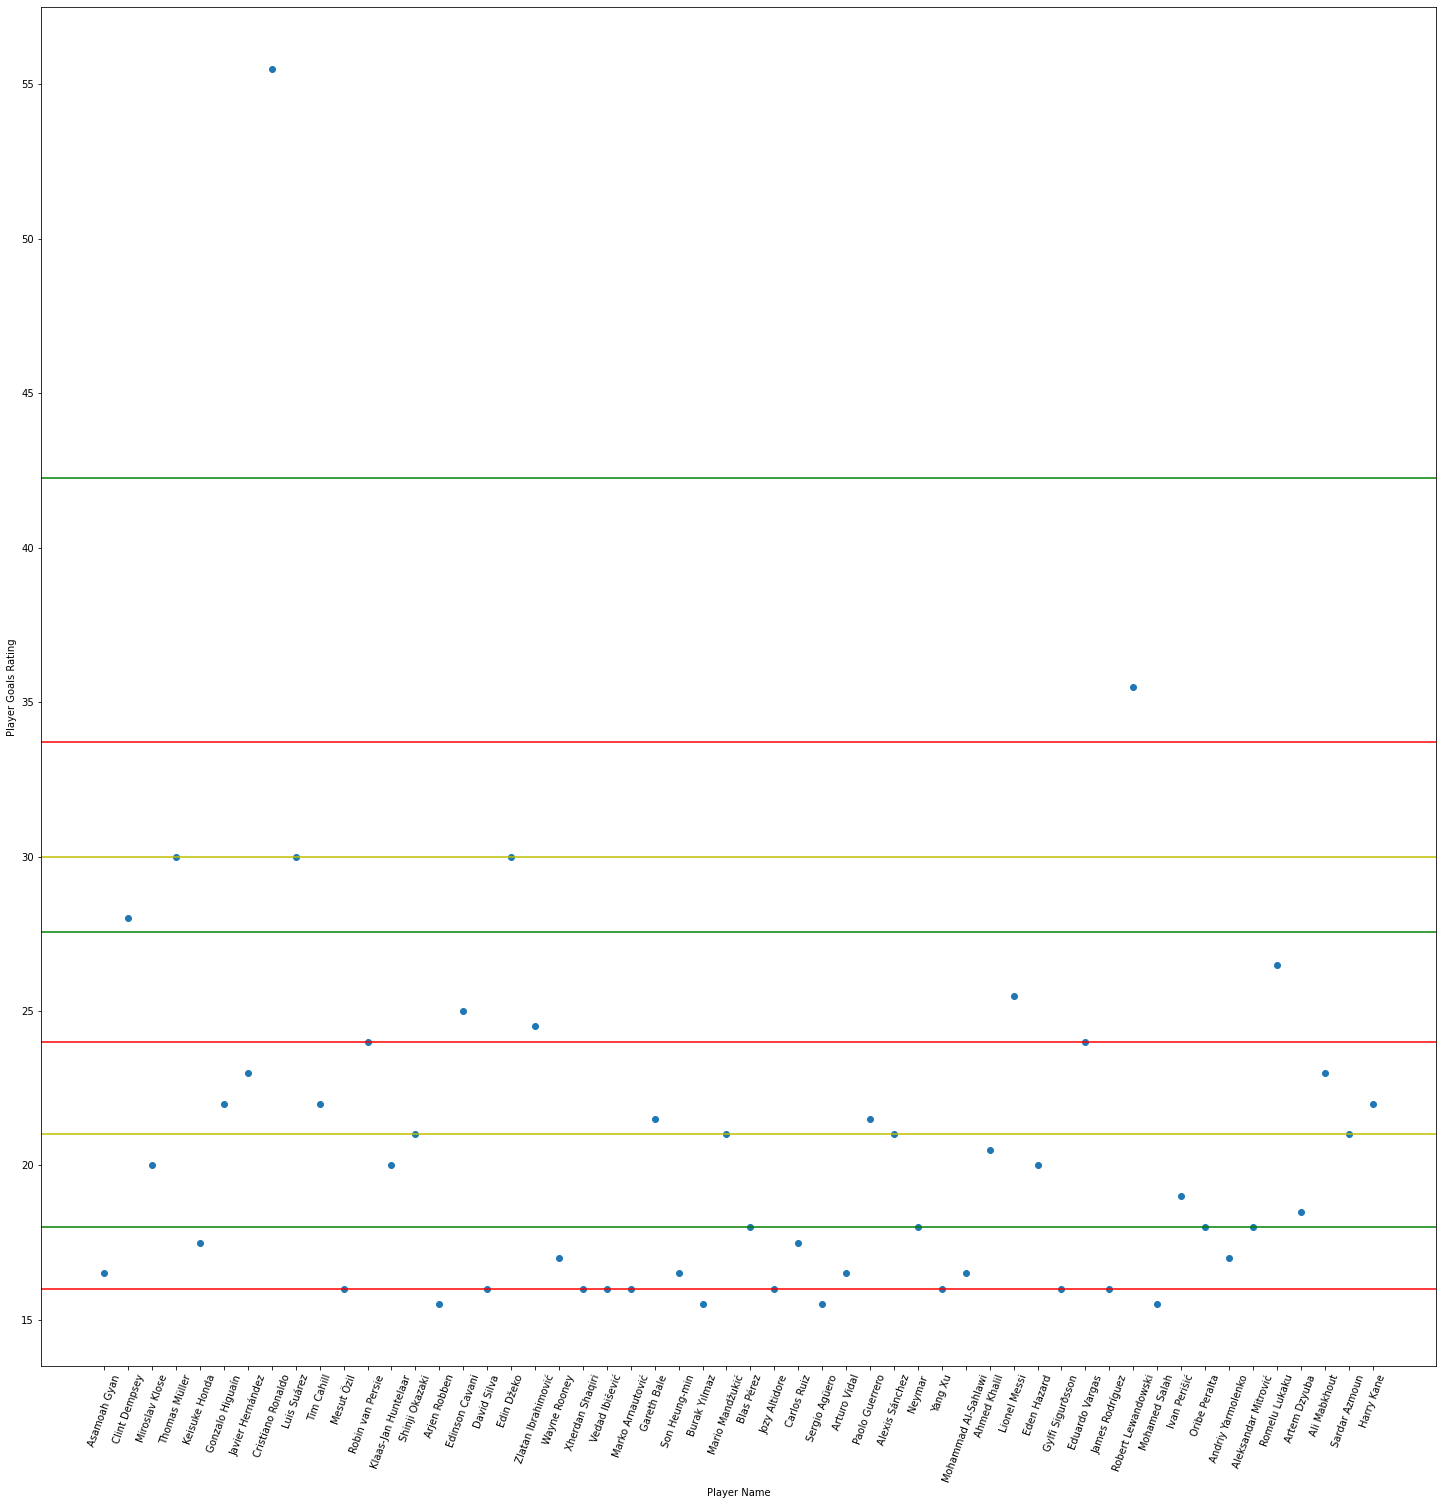

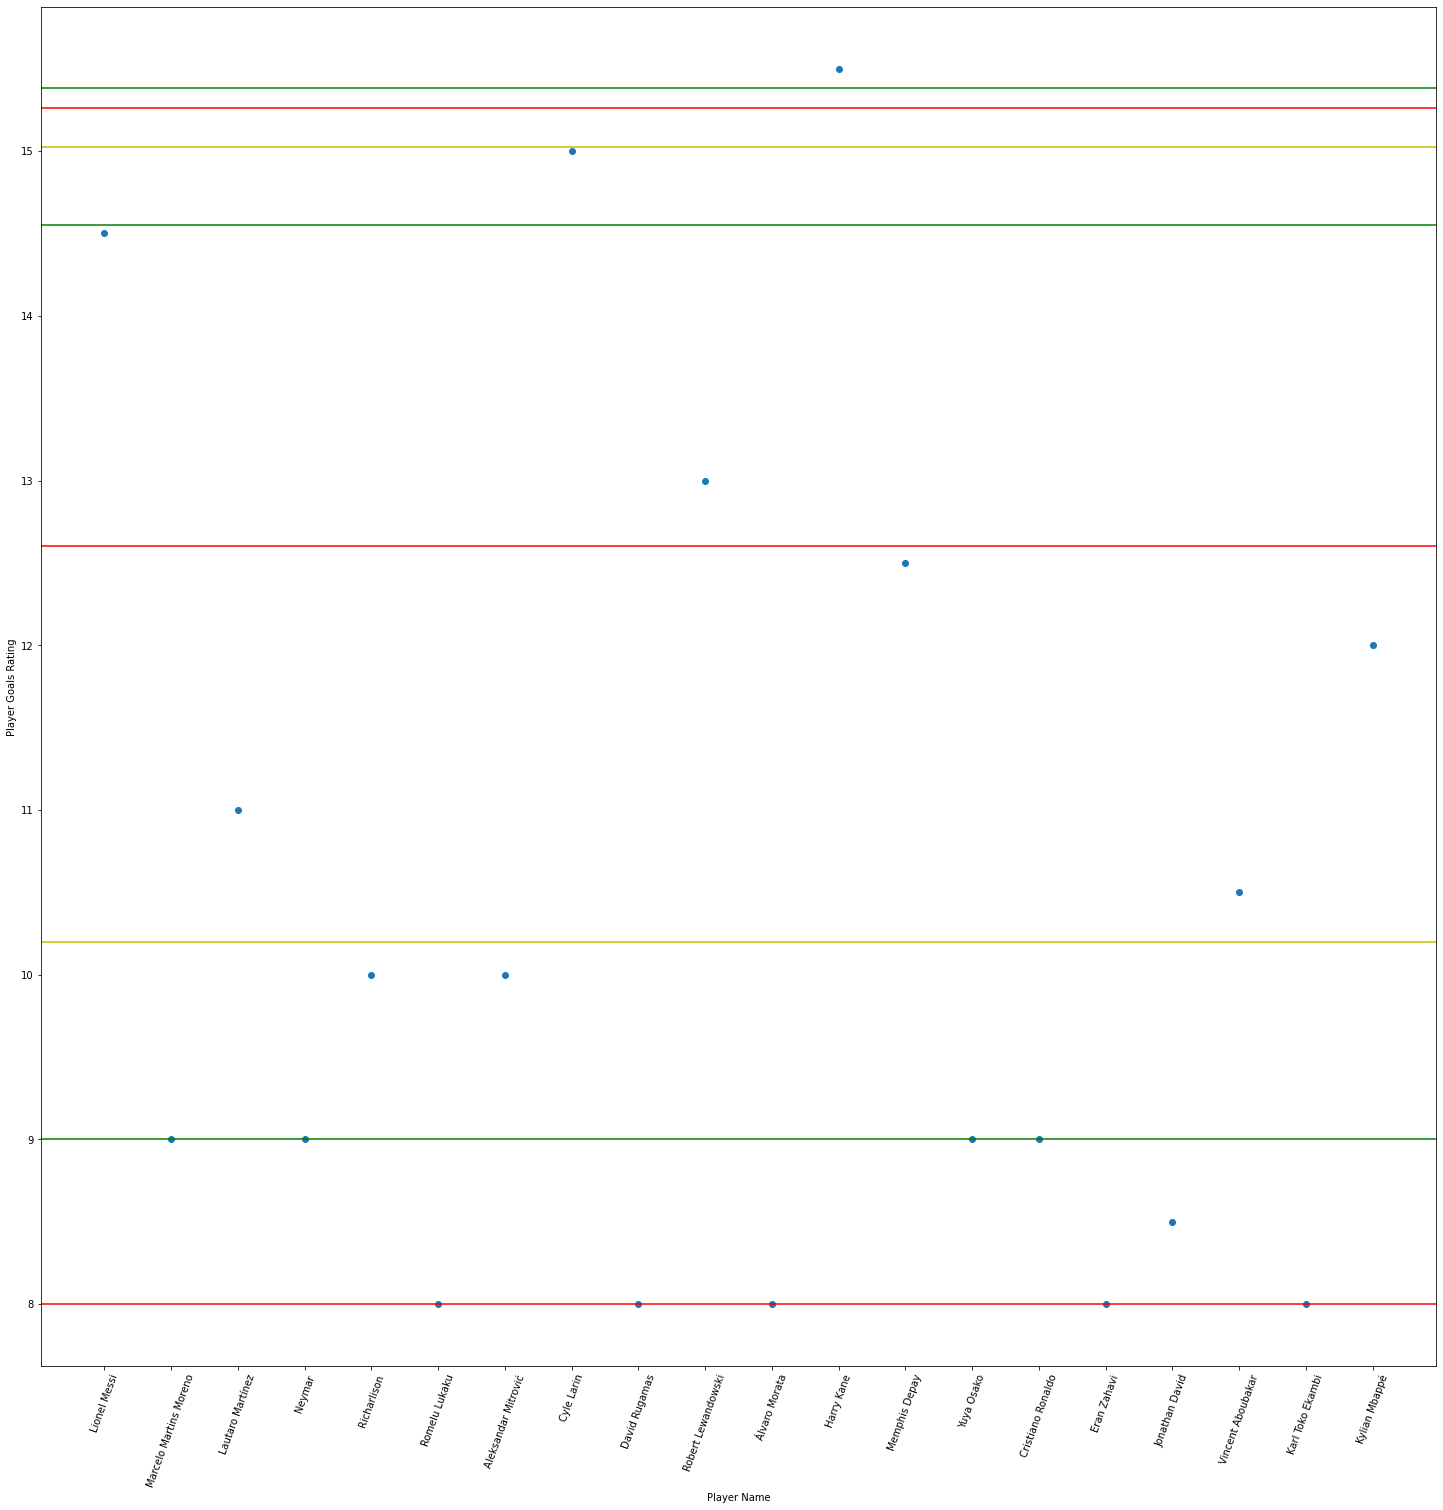

In [10]:
for dframe in decade_totals:
    if len(dframe.rating) < 65: 
        scatterplot_scorer_df(dframe)
    elif len(dframe.rating) < 130:
        scatterplot_scorer_df(dframe[dframe.rating >= np.percentile(dframe.rating.tolist(), 50)])
    elif len(dframe.rating) < 260:
        scatterplot_scorer_df(dframe[dframe.rating >= np.percentile(dframe.rating.tolist(), 85)])
    else:
        scatterplot_scorer_df(dframe[dframe.rating >= np.percentile(dframe.rating.tolist(), 98.5)])


# Country Analysis (Most Scored, Most Conceded)